In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# import some data to play with
data = pd.read_csv('C:/Users/Admin/Desktop/Data/Assignments New/Decision Trees/Fraud_check (1).csv',index_col=0)

In [19]:
data.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,Single,68833,50047,10,YES
YES,Divorced,33700,134075,18,YES
NO,Married,36925,160205,30,YES
YES,Single,50190,193264,15,YES
NO,Married,81002,27533,28,NO


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, NO to NO
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Marital.Status   600 non-null    object
 1   Taxable.Income   600 non-null    int64 
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(3), object(2)
memory usage: 28.1+ KB


In [21]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban'])

In [22]:
x=data.drop(['Marital.Status'],axis=1)
y=data['Marital.Status']

In [23]:
x

,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,
NO,68833,50047,10,1
YES,33700,134075,18,1
NO,36925,160205,30,1
YES,50190,193264,15,1
NO,81002,27533,28,0
...,...,...,...,...
YES,76340,39492,7,1
YES,69967,55369,2,1
NO,47334,154058,0,1


In [24]:
y

Undergrad
NO     2
YES    0
NO     1
YES    2
NO     1
      ..
YES    0
YES    0
NO     0
YES    1
NO     0
Name: Marital.Status, Length: 600, dtype: int32

In [25]:
data['Marital.Status'].unique()

array([2, 0, 1])

In [28]:
data1=data.rename({"Marital.Status":"maritalstatus"},inplace=True)

In [34]:
colnames = list(data.columns)
colnames

['Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [35]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [36]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

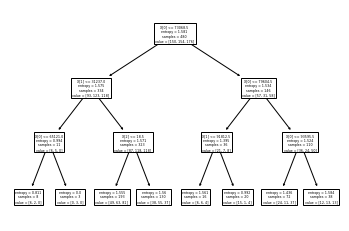

In [37]:
#PLot the decision tree
tree.plot_tree(model);


In [42]:
fn=['Taxable.Income (cm)','City.Population (cm)','Work.Experience (cm) ]
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

SyntaxError: EOL while scanning string literal (<ipython-input-42-adf9bdf20af4>, line 1)

In [43]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    66
1    47
0     7
dtype: int64

In [44]:
preds

array([0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2,
       0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2])

In [45]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Marital.Status,,,
0,0,17,22
1,2,13,25
2,5,17,19


In [46]:
# Accuracy 
np.mean(preds==y_test)

0.26666666666666666

### Building Decision Tree Classifier (CART) using Gini Criteria

In [47]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [48]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.26666666666666666

#### Decision Tree Regression Example

In [50]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [52]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [54]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
#Find the accuracy
model.score(X_test,y_test)

-1.145603979117626